# Oil Price Prediction with Recurrent Neural Networks

This notebook is an exploration of the different time-series methods. The goal is to try to predict the prices of brent, based on the daily historical price.

Useful links: 
1. [Time Series Forcesating Methods Cheet Sheet](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)

In [14]:
# basic general imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('./datasets/Oil_Prices/brent-daily_csv.csv')

**Plan of Attack**

1. Explore the data and derive features from it, if possible.
2. Make different models.
    1. Simple Autoregression (AR)
    2. Moving Average (MA)
    3. Autoregressive Moving Average (ARMA)
    4. Autoregressive Integrated Moving Average (ARIMA)
    5. Seasonal Autoregressive Integrated Moving-Average (SARIMA)
    6. Simple Perceptron
    6. Reccurent Neural Networks
3. Compare the models.

## 1. Getting our Bearings
Exploring the dataset to better understand the data.

In [25]:
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [26]:
df.describe()

,Price
count,8116.000000
mean,46.118689
std,32.844668
min,9.100000
25%,18.680000
50%,30.730000
75%,67.582500
max,143.950000


### 1.1 Basic Validations
Initialy we want to make sure that everything in the dataset is complying to common sense, such as:
1. Years should not be above 2019
2. Months should be only 12 and from 1 to 12 (0 to 11 if zero-indexed)
3. Days should be between 1 and 31 (0 to 30 if zero-indexed again)
4. Some different validations can be applied (such as April having no more than 30 days, February 29 and so on) on a later point.

#### 1.1.1 Split the dates into different components

In [39]:
from datetime import datetime

df['DateFixed'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['Year'] = df['DateFixed'].apply(lambda x: x.year)
df['Month'] = df['DateFixed'].apply(lambda x: x.month)
df['Day'] = df['DateFixed'].apply(lambda x: x.day)

#### 1.1.2 Simple date validations

In [47]:
def get_min_max(dataframe, column):
    '''
        Returns the min and max of the desired column. 
        (Spares me the time to write it 3 times, DRY right?)
    '''
    return dataframe[column].min(), dataframe[column].max()

In [52]:
min_year, max_year = get_min_max(df, 'Year')
min_month, max_month = get_min_max(df, 'Month')
min_day, max_day = get_min_max(df, 'Day')
mins = [min_year, min_month, min_day]
maxes = [max_year, max_month, max_day]
min_maxes = pd.DataFrame({'Mins': mins, 'Maxes': maxes})
min_maxes.index = ['Year', 'Months', 'Days']
min_maxes

,Mins,Maxes
Year,1987,2019
Months,1,12
Days,1,31


Nothing out of the ordinary. The dataset passes validation points 1 to 3.

#### 1.1.4 The search for missing values
Lets find if the dataset contains any missing values.

In [59]:
# Ask a simple question is there any values that are 
any_missing_values = len(df[df['Price'].isna()]) != 0
any_missing_values

False

The dataset responded that it has no missing values.

#### 1.1.5 Visual Exploration of the data.
A simple exploration of the data via charts. A different set of aggreations should be used - on Year and Month.

In [69]:
df['Year_Month'] = df['Year'].map(str) + '_' + df['Month'].map(str)

In [73]:
# create a dataframe that holds only Year, Year_Month and Price
df_ym = df.loc[:, ['Year', 'Year_Month', 'Price']]

*Averages*

In [82]:
df_yearly_avg = df_ym.groupby('Year').mean().reset_index()
df_monthly_avg = df_ym.groupby('Year_Month').mean().reset_index()

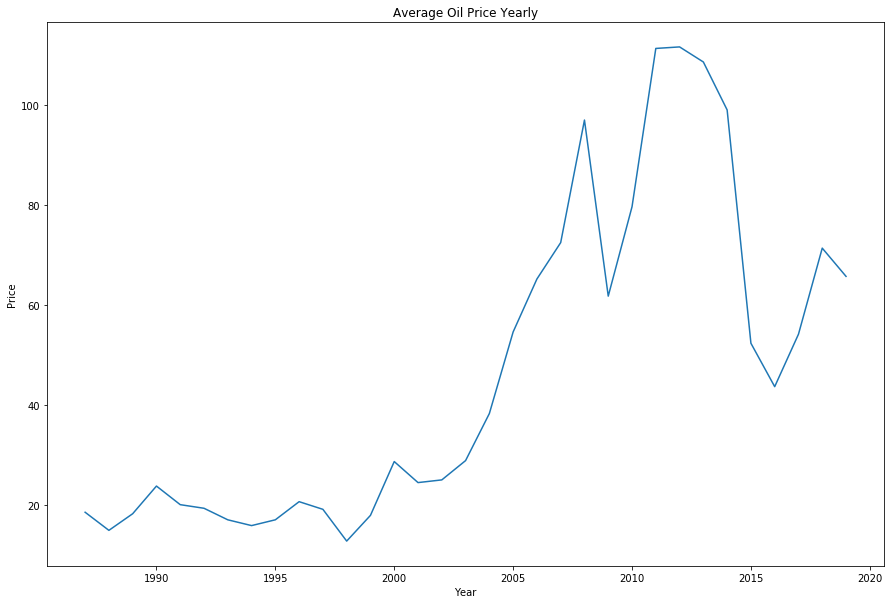

In [100]:
# Line chart
plt.subplots(figsize=(15, 10))
sns.lineplot(x='Year', y='Price', data=df_yearly_avg)
plt.title('Average Oil Price Yearly')
plt.show()

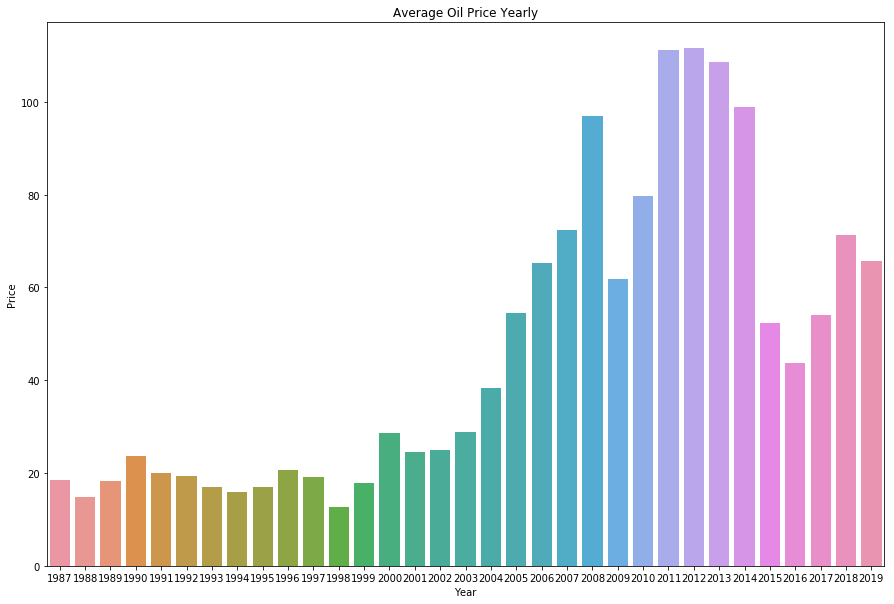

In [105]:
# Line chart
plt.subplots(figsize=(15, 10))
sns.barplot(x='Year', y='Price', data=df_yearly_avg)
plt.title('Average Oil Price Yearly')
plt.show()

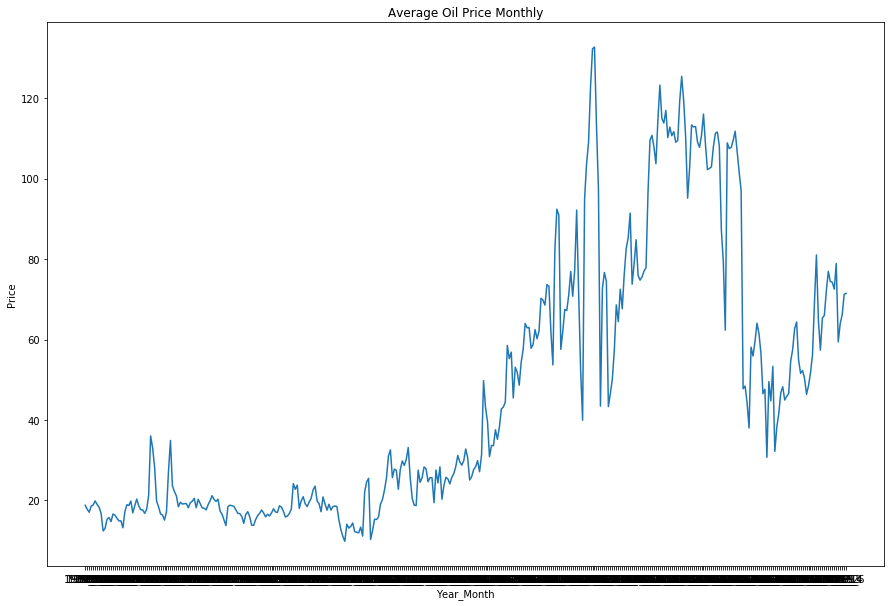

In [103]:
plt.subplots(figsize=(15, 10))
chart = sns.lineplot(x='Year_Month', y='Price', data=df_monthly_avg)
# plt.setp(chart.xaxis.get_majorticklabels(), rotation=90) # WIP: Get every 5th label and set the ticks
plt.title('Average Oil Price Monthly')
plt.show()